In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
import scipy.stats as ss

In [2]:
import sys
sys.path.append("../functions/")
#for data preprocessing
import Scripts_Data_Processing
import imp

imp.reload(Scripts_Data_Processing)
from Scripts_Data_Processing import *
#for model fit
import Scripts_LogRegModels_v2
imp.reload(Scripts_LogRegModels_v2)
from Scripts_LogRegModels_v2 import *

import Triplets_Correlations_Scatterplots
imp.reload( Triplets_Correlations_Scatterplots)
from  Triplets_Correlations_Scatterplots import *

import Single_LogRegModels
imp.reload(Single_LogRegModels)
from Single_LogRegModels import fit_model_singRL

import Wrappers
imp.reload(Wrappers)
from Wrappers import *

import Plot_models
imp.reload(Plot_models)
from Plot_models import *

import Trait_Data
imp.reload(Trait_Data)
from Trait_Data import *

# Load & Prepare Questionnaire Data

## STAI

### STAI Day 1

In [ ]:
STAI1_df = load_trait_data(sheet = 'STAI', header = 3, lastcol = 30, start = 43, end = 49)
STAI1_df = STAI1_df.rename(columns={'index': 'MID', 'State anxiety': 'StateAnxiety_1', 'Positive affect': 'PositiveAffect_1', 'Trait anxiety': 'TraitAnxiety_1', 'Trait anxiety sub': 'TraitAnxietySub_1', 'Trait depression sub': 'TraitDepressionSub_1'})
STAI_df.head()

### STAI Day 2

In [ ]:
STAI2_df = load_trait_data(sheet = 'STAI2', header = 3, lastcol = 30, start = 43, end = 49)
STAI2_df = STAI2_df.rename(columns={'index': 'MID', 'State anxiety': 'StateAnxiety_2', 'Positive affect': 'PositiveAffect_2', 'Trait anxiety': 'TraitAnxiety_2', 'Trait anxiety sub': 'TraitAnxietySub_2', 'Trait depression sub': 'TraitDepressionSub_2'})
STAI2_df.head()

### STAI Day 3

In [ ]:
STAI3_df = load_trait_data(sheet = 'STAI3', header = 3, lastcol = 8, start = 43, end = 49)
STAI3_df = STAI3_df.rename(columns={'index': 'MID', 'State anxiety': 'StateAnxiety_3', 'Positive affect': 'PositiveAffect_3', 'Trait anxiety': 'TraitAnxiety_3', 'Trait anxiety sub': 'TraitAnxietySub_3', 'Trait depression sub': 'TraitDepressionSub_3'})
STAI3_df.head()

### STAI Dataframe and Correlations (Sanity Check)

In [6]:
STAI_df = STAI1_df.merge(STAI2_df, 'left')
STAI_df = STAI_df.merge(STAI3_df, 'left', on='MID')
STAI_df['StateAnxiety'] = STAI_df[['StateAnxiety_1', 'StateAnxiety_2', 'StateAnxiety_3']].mean(axis=1)
STAI_df['PositiveAffect'] = STAI_df[['PositiveAffect_1', 'PositiveAffect_2', 'PositiveAffect_3']].mean(axis=1)
STAI_df['TraitAnxiety'] = STAI_df[['TraitAnxiety_1', 'TraitAnxiety_2', 'TraitAnxiety_3']].mean(axis=1)
STAI_df['TraitAnxietySub'] = STAI_df[['TraitAnxietySub_1', 'TraitAnxietySub_2', 'TraitAnxietySub_3']].mean(axis=1)
STAI_df['TraitDepressionSub'] = STAI_df[['TraitDepressionSub_1', 'TraitDepressionSub_2', 'TraitDepressionSub_3']].mean(axis=1)

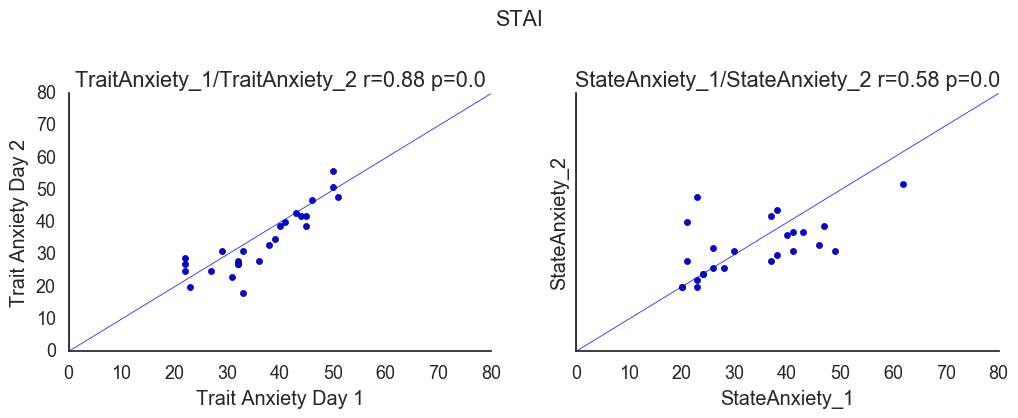

In [7]:
f = plotSTAI(STAI_df, 'STAI')

## BDI

In [ ]:
BDI_df = load_trait_data(sheet = 'BDI', header = 3, lastcol = 29, start = 23, end = 26)
BDI_df = BDI_df.rename(columns={'index': 'MID'})
BDI_df.head()

## MASQ

In [ ]:
MASQ_df = load_trait_data(sheet = 'MASQ', header = 3, lastcol = 29, start = 92, end = 97)
MASQ_df = MASQ_df.rename(columns={'index': 'MID'})
MASQ_df.head()

## IUS

In [ ]:
IUS_df = load_trait_data(sheet = 'IUS', header = 2, lastcol = 29, start = 29, end = 32)
IUS_df = IUS_df.rename(columns={'index': 'MID'})
IUS_df.head()

## PSWQ

In [ ]:
PSWQ_df = load_trait_data(sheet = 'PSWQ', header = 3, lastcol = 29, start = 18, end = 19)
PSWQ_df = PSWQ_df.rename(columns={'index': 'MID'})
PSWQ_df.head()

## CES-D

In [ ]:
CESD_df = load_trait_data(sheet = 'CES-D', header = 3, lastcol = 30, start = 22, end = 27)
CESD_df = CESD_df.rename(columns={'index': 'MID'})
CESD_df.head()

## BFI2

## EPQ

In [ ]:
EPQ_df = load_trait_data(sheet = 'EPQ', header = 3, lastcol = 29, start = 92, end = 96)
EPQ_df = EPQ_df.rename(columns={'index': 'MID'})
EPQ_df.head()

## BB

In [ ]:
BB_df = load_trait_data(sheet = 'BB', header = 3, lastcol = 29, start = 26, end = 30)
BB_df = BB_df.rename(columns={'index': 'MID'})
BB_df.head()

## OCIR

# Load and prepare model param data (triplets)

## model with ambiguous level

In [8]:
def process_model_rl(model = 'ambi_both', which_trial = 'all'):
    
    kwargs = {}
    
    if model == 'ambi_both':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present','sqrt_prop_revealed']
    elif model == 'ambi_present':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','ambig_present']
    elif model == 'ambi_level':
        kwargs['params']=['mag_diff_rl','prob_diff_rl','sqrt_prop_revealed']

    # for gain
    kwargs['task']='gain'

    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30']
    model_summary_df_g, model_param_df_g=(all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial))

    # for loss
    kwargs['task']='loss'
    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23_2', '25_2', '26_2', '27_2', '28_2', '29', '30']
    model_summary_df_l, model_param_df_l=all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial)

    # for shock
    kwargs['task']='shock'
    vp_list = ['06', '07', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '22', '23', '25', '26', '27', '28', '29', '30']
    model_summary_df_s, model_param_df_s=all_subs_model_fits(vp_list,fit_model_singRL,kwargs, which_trial = which_trial)

    # stacking all the df's for a single model 
    model_param_df = pd.concat((model_param_df_l,model_param_df_g,model_param_df_s))
    model_summary_df = pd.concat((model_summary_df_l,model_summary_df_g,model_summary_df_s))
    
    #reverse beta when necessary
    # magnitude
    model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'mag_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'shock')& (model_param_df.parameter == 'mag_diff_rl'),'beta']*-1
    # probability
    model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'prob_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'shock') & (model_param_df.parameter == 'prob_diff_rl'),'beta']*-1
    model_param_df.loc[(model_param_df.task == 'loss') & (model_param_df.parameter == 'prob_diff_rl'), 'beta'] = model_param_df.loc[(model_param_df.task == 'loss') & (model_param_df.parameter == 'prob_diff_rl'),'beta']*-1
    
    return(model_param_df, model_summary_df)

In [9]:
model_param_df, model_summary_df = process_model_rl(model = 'ambi_level', which_trial = 'all')
#change MIDs to match between gainloss and shock versions
model_param_df.MID = model_param_df.MID.apply(lambda x: x.replace('_2', ''))
model_param_df = model_param_df.loc[model_param_df['MID']!='vp29',]
model_param_df = model_param_df.loc[model_param_df['MID']!='vp19',]


In [10]:
triplet_intercept = triplet_rl(model_param_df, 'intercept_r')
triplet_magdiff = triplet_rl(model_param_df, 'mag_diff_rl')
triplet_probdiff = triplet_rl(model_param_df, 'prob_diff_rl')
triplet_ambiguityLevel = triplet_rl(model_param_df, 'sqrt_prop_revealed_diff_rl')

In [11]:
triplet_intercept_STAI = triplet_intercept.merge(STAI_df, 'left')
triplet_probdiff_STAI = triplet_probdiff.merge(STAI_df, 'left')
triplet_magdiff_STAI = triplet_magdiff.merge(STAI_df, 'left')
triplet_ambiguityLevel_STAI = triplet_ambiguityLevel.merge(STAI_df, 'left')

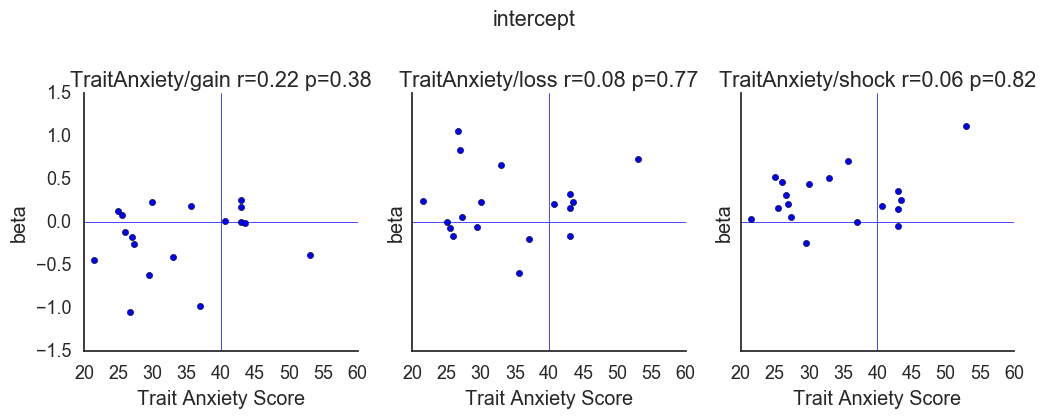

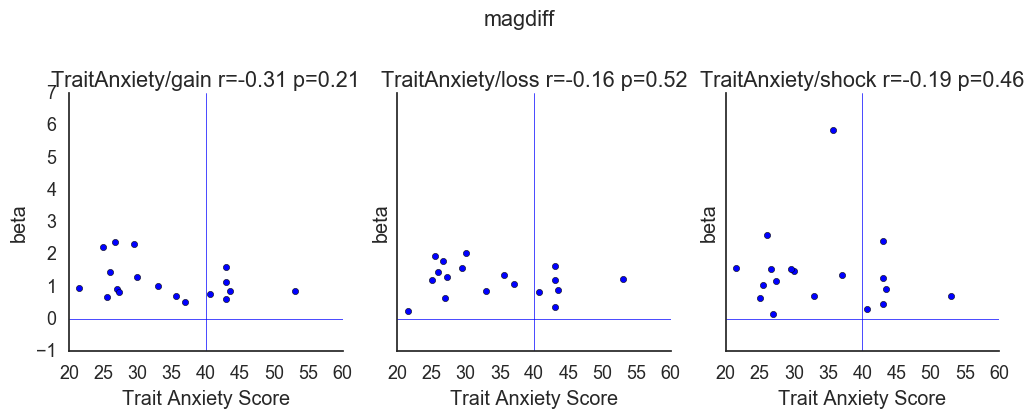

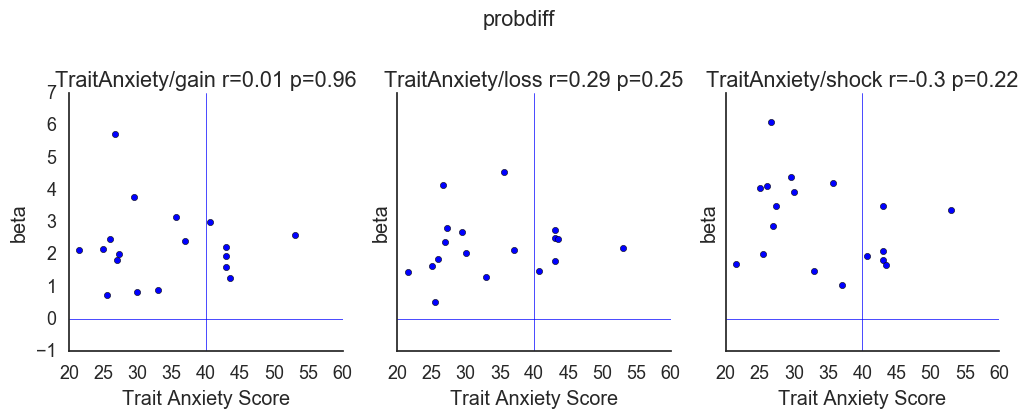

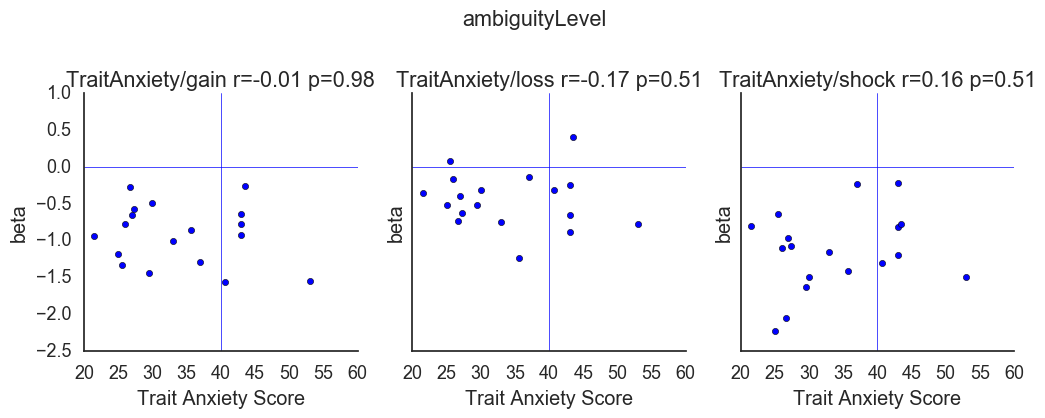

In [12]:
plotTrait_rl(triplet_intercept_STAI, 'intercept')
plotTrait_rl(triplet_magdiff_STAI, 'magdiff')
plotTrait_rl(triplet_probdiff_STAI, 'probdiff')
f = plotTrait_rl(triplet_ambiguityLevel_STAI, 'ambiguityLevel')